In [3]:
#Importing necessary header files
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd 
from scipy import signal
import pickle

from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans, MeanShift, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression

In [4]:
train=pd.read_csv(r'I:\CS675\train.csv')
train.head()
sample=pd.read_csv(r'I:\CS675\sample_submission.csv')
sample=sample.sort_values('segment_id')

In [5]:
sample

,segment_id,time_to_eruption
4196,860288,0
154,1067970,0
624,1265147,0
644,1276338,0
1131,1474802,0
...,...,...
2638,2144702563,0
2639,2144912493,0
2640,2144964899,0
2641,2146756668,0


In [6]:
single_seg=pd.read_csv(r'I:\CS675\train\513181.csv')
single_seg
single_seg.columns

Index(['sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10'],
      dtype='object')

In [7]:
cols=list(single_seg.columns)

In [8]:
# value of y after sorting according to segment
train = train.sort_values('segment_id')
y = train['time_to_eruption']

In [18]:
train_input=pickle.load(open('train.pkl','rb'))

In [35]:
#Using psd and signal welch 
train_data = []
i=0

for segment in train['segment_id']:
    output_psd = []
    dataframe = pd.read_csv(f'I:/CS675/train/{segment}.csv')
    for col in cols:
        freq, psd = signal.welch(dataframe[col],100)
        output_psd = np.append(output_psd,psd)
        
    
    train_data = np.append(train_data,output_psd)
    
    
    i=i+1
    #print('Manipulating segment {}, {} out of {}'.format(segment,i,len(train_labels['segment_id'])))

pickle.dump(train_data,open('train.pkl','wb'))

In [36]:
train_data

array([3.73091358e+03, 2.21987959e+04, 2.92472437e+04, ...,
       2.12229430e-03, 2.15393159e-03, 1.21389588e-03])

In [37]:
test_data = []
k=0

for segment in sample['segment_id']:
    output_psd = []
    dataframe = pd.read_csv(f'I:/CS675/test/{segment}.csv')
    for col in cols:
        freq, psd = signal.welch(dataframe[col],100)
        output_psd = np.append(output_psd,psd)
    
    test_data = np.append(test_data,output_psd)
    
    k=1+k
    #print('Manipulating segment {}, {} out of {}'.format(segment,k,len(test_sample['segment_id'])))


num_features = len(output_psd)
test_data = np.reshape(test_data,(-1,num_features))
print('Finalized input shape: {}'.format(test_data.shape))

pickle.dump(test_data,open('test.pkl','wb'))

Finalized input shape: (4520, 1290)


In [38]:
output_psd.shape

(1290,)

In [39]:
train_data

array([3.73091358e+03, 2.21987959e+04, 2.92472437e+04, ...,
       2.12229430e-03, 2.15393159e-03, 1.21389588e-03])

In [40]:
num_features = len(output_psd)
train_data = np.reshape(train_data,(i,num_features))
train_input.shape

(1290,)

In [41]:
dt=pd.DataFrame(train_data)
finaldf=dt

In [42]:
dt

,0,1,2,3,4,5,6,7,8,9,...,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289
0,3730.913580,22198.795907,2.924724e+04,2.861230e+04,2.496106e+04,1.296504e+04,7441.693161,5332.538427,4408.935906,2566.928741,...,0.004063,0.002720,0.002254,0.002292,0.002198,0.002178,0.002275,0.002309,0.002292,0.001116
1,35733.552774,206090.155955,1.297228e+05,1.210402e+05,1.329954e+05,9.263386e+04,68975.577876,37942.643075,15323.324615,9229.745270,...,0.003858,0.002727,0.002272,0.002163,0.002096,0.002120,0.002167,0.002244,0.002254,0.001138
2,2686.391857,14492.860146,2.239948e+04,2.318884e+04,1.871965e+04,1.598087e+04,13561.154189,9303.297980,6683.350547,4699.894421,...,0.007599,0.003756,0.002604,0.002268,0.002250,0.002167,0.002381,0.002582,0.002389,0.001100
3,4001.545322,18710.034917,3.162688e+04,5.133069e+04,7.022224e+04,4.046046e+04,17801.365319,10260.006958,6649.534657,4233.008909,...,0.009982,0.004485,0.002909,0.002504,0.002017,0.001963,0.002087,0.002196,0.002112,0.001044
4,1104.768052,5716.597208,1.740869e+04,3.822786e+04,5.458062e+04,2.765777e+04,11480.076171,7863.663875,6893.787107,5128.590131,...,0.005914,0.003392,0.002493,0.002277,0.002139,0.002162,0.002157,0.002102,0.002304,0.001123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,6462.228520,35161.823197,4.741674e+04,3.504113e+04,3.299303e+04,1.964507e+04,12530.828733,11811.423815,8442.639468,4595.708290,...,0.022461,0.007999,0.004556,0.002665,0.002397,0.002288,0.002333,0.002054,0.002153,0.001175
4427,3793.148105,18377.263038,1.779414e+04,3.573772e+04,3.147162e+04,2.156068e+04,15306.993609,16087.453132,14247.377878,8375.037778,...,0.060049,0.017864,0.005382,0.002770,0.002366,0.002486,0.002408,0.002248,0.002342,0.001221
4428,8232.628232,33222.289372,1.030658e+05,3.226809e+05,4.750114e+05,2.812185e+05,129509.668456,82909.808631,45958.434849,21275.106272,...,0.004764,0.002964,0.002310,0.002257,0.002260,0.002214,0.002345,0.002279,0.002111,0.001113
4429,3021.106448,15625.038973,3.207444e+04,4.616527e+04,3.288586e+04,2.000917e+04,12367.031954,10031.525239,7848.331124,3863.770549,...,2.952443,1.244260,0.411642,0.044193,0.006017,0.003041,0.002621,0.002577,0.002663,0.001305


In [43]:
#Using variance
dt.loc[:, dt.var() > 35733]

,0,1,2,3,4,5,6,7,8,9,...,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289
0,3730.913580,22198.795907,2.924724e+04,2.861230e+04,2.496106e+04,1.296504e+04,7441.693161,5332.538427,4408.935906,2566.928741,...,0.004063,0.002720,0.002254,0.002292,0.002198,0.002178,0.002275,0.002309,0.002292,0.001116
1,35733.552774,206090.155955,1.297228e+05,1.210402e+05,1.329954e+05,9.263386e+04,68975.577876,37942.643075,15323.324615,9229.745270,...,0.003858,0.002727,0.002272,0.002163,0.002096,0.002120,0.002167,0.002244,0.002254,0.001138
2,2686.391857,14492.860146,2.239948e+04,2.318884e+04,1.871965e+04,1.598087e+04,13561.154189,9303.297980,6683.350547,4699.894421,...,0.007599,0.003756,0.002604,0.002268,0.002250,0.002167,0.002381,0.002582,0.002389,0.001100
3,4001.545322,18710.034917,3.162688e+04,5.133069e+04,7.022224e+04,4.046046e+04,17801.365319,10260.006958,6649.534657,4233.008909,...,0.009982,0.004485,0.002909,0.002504,0.002017,0.001963,0.002087,0.002196,0.002112,0.001044
4,1104.768052,5716.597208,1.740869e+04,3.822786e+04,5.458062e+04,2.765777e+04,11480.076171,7863.663875,6893.787107,5128.590131,...,0.005914,0.003392,0.002493,0.002277,0.002139,0.002162,0.002157,0.002102,0.002304,0.001123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,6462.228520,35161.823197,4.741674e+04,3.504113e+04,3.299303e+04,1.964507e+04,12530.828733,11811.423815,8442.639468,4595.708290,...,0.022461,0.007999,0.004556,0.002665,0.002397,0.002288,0.002333,0.002054,0.002153,0.001175
4427,3793.148105,18377.263038,1.779414e+04,3.573772e+04,3.147162e+04,2.156068e+04,15306.993609,16087.453132,14247.377878,8375.037778,...,0.060049,0.017864,0.005382,0.002770,0.002366,0.002486,0.002408,0.002248,0.002342,0.001221
4428,8232.628232,33222.289372,1.030658e+05,3.226809e+05,4.750114e+05,2.812185e+05,129509.668456,82909.808631,45958.434849,21275.106272,...,0.004764,0.002964,0.002310,0.002257,0.002260,0.002214,0.002345,0.002279,0.002111,0.001113
4429,3021.106448,15625.038973,3.207444e+04,4.616527e+04,3.288586e+04,2.000917e+04,12367.031954,10031.525239,7848.331124,3863.770549,...,2.952443,1.244260,0.411642,0.044193,0.006017,0.003041,0.002621,0.002577,0.002663,0.001305


In [44]:
#handling missing data
dt.isnull().sum()

0        36
1        36
2        36
3        36
4        36
       ... 
1285    159
1286    159
1287    159
1288    159
1289    159
Length: 1290, dtype: int64

In [45]:
#Padding with values for missing data  #techniqu 1 of W9
dt=dt.fillna(method='pad')

In [46]:
##Using log transform to remove outliers and creating new features
cols=list(dt.columns)
for i in cols:
    dt['log_'+str(i)]=(dt[i]-dt[i].min()+1) .transform(np.log)

In [47]:


# using IQR for identifying and removing outliers
# Q1 = dt.quantile(0.00)
# Q3 = dt.quantile(0.95)
# IQR = Q3 - Q1

# dt = dt[~((dt < (Q1 - 1.5 * IQR)) |(dt > (Q3 + 1.5 * IQR))).any(axis=1)]



In [48]:
#Normalizing  #technique 3

feature_scale=[feature for feature in dt.columns ]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dt[feature_scale])
dt =pd.DataFrame(scaler.transform(dt[feature_scale]), columns=feature_scale)
dt.head()

,0,1,2,3,4,5,6,7,8,9,...,log_1280,log_1281,log_1282,log_1283,log_1284,log_1285,log_1286,log_1287,log_1288,log_1289
0,0.000302,0.000257,0.000110,0.000070,0.000114,0.000129,0.000097,0.000073,0.000090,0.000074,...,0.000070,0.000036,0.000026,0.000036,0.000036,0.000034,0.000048,0.000049,0.000040,0.000028
1,0.003172,0.002643,0.000512,0.000307,0.000646,0.001036,0.001040,0.000610,0.000353,0.000298,...,0.000052,0.000037,0.000028,0.000024,0.000026,0.000029,0.000038,0.000043,0.000036,0.000030
2,0.000209,0.000157,0.000082,0.000056,0.000084,0.000164,0.000191,0.000139,0.000145,0.000146,...,0.000390,0.000130,0.000058,0.000034,0.000040,0.000033,0.000058,0.000074,0.000049,0.000027
3,0.000327,0.000212,0.000119,0.000128,0.000337,0.000442,0.000256,0.000154,0.000144,0.000130,...,0.000605,0.000195,0.000085,0.000055,0.000019,0.000015,0.000031,0.000038,0.000023,0.000021
4,0.000067,0.000043,0.000062,0.000094,0.000260,0.000296,0.000159,0.000115,0.000150,0.000160,...,0.000238,0.000097,0.000048,0.000034,0.000030,0.000033,0.000037,0.000030,0.000041,0.000029


In [49]:
dt.shape #(4431, 2580)

(4431, 2580)

Skew is: 0.05934777879835997


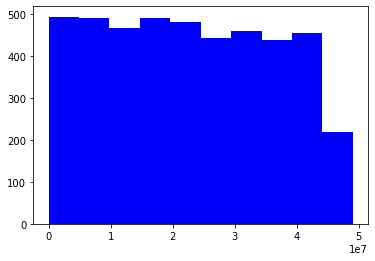

In [50]:
print ("Skew is:",y.skew())  # Checking skew of the target
plt.hist(y, color='blue')
plt.show()

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(dt)
x_pca = pd.DataFrame(x_pca)



In [52]:
explained_variance = pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)[0:5]

array([0.25524342, 0.37833676, 0.46459006, 0.54136814, 0.5943029 ])

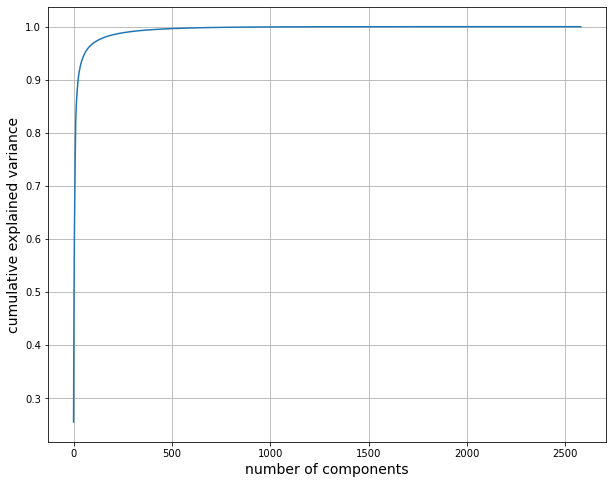

In [53]:


plt.figure(figsize = (10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components', fontsize = 14)
plt.ylabel('cumulative explained variance', fontsize = 14)

plt.grid(True);



In [54]:
x_train, x_test, y_train, y_test = train_test_split(dt, y, test_size=0.2, random_state=0)

In [55]:

cols=list(x_train.columns)
pca = PCA(n_components = 50)
x_train = pca.fit_transform(x_train) 
x_test = pca.transform(x_test)



In [56]:


imp_features = []
for i in range(50):
   
    imp_features_index = np.abs(pca.components_[i]).argmax()
    imp_features.append(cols[imp_features_index])
    
imp_features_dict = {'PC{}'.format(i+1): imp_features[i] for i in range(50)}
features=pd.DataFrame(list(imp_features_dict.items()), columns=['PC', 'Name'])



In [57]:
features.head()

,PC,Name
0,PC1,log_1083
1,PC2,log_814
2,PC3,log_1083
3,PC4,log_233
4,PC5,log_603


In [58]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn import metrics

rf_base = RandomForestRegressor(n_estimators=400)


rf_base.fit(x_train, y_train)
y_pred_rf_base = rf_base.predict(x_test)

rf_base.score(x_test,y_test)

0.5866897978769321

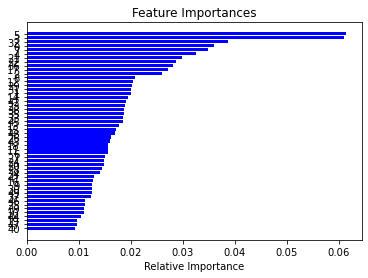

In [59]:


importances = rf_base.feature_importances_
indices = np.argsort(importances)

features = cols
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [60]:
#Kmeans
X=dt.values
kmeans = KMeans(n_clusters=3)
kmeans.fit(X) 
kmeans.predict(X) 

array([1, 2, 2, ..., 2, 0, 2])

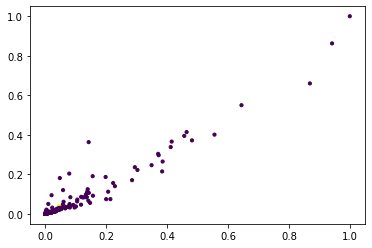

In [61]:
#DBSCAN


db = DBSCAN(eps=0.01, min_samples=6).fit(X)
agc = AgglomerativeClustering(linkage='single')
agc.fit(X)
plt.scatter(X[:,0], X[:,1],s=10,c=agc.labels_)

In [62]:


range_n_clusters = [2, 3, 4, 5, 6]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, silhouette_score(X,labels))



2 0.23214172225473556
3 0.12995340278328768
4 0.13739563865831386
5 0.1432785890785743
6 0.15243683899508365


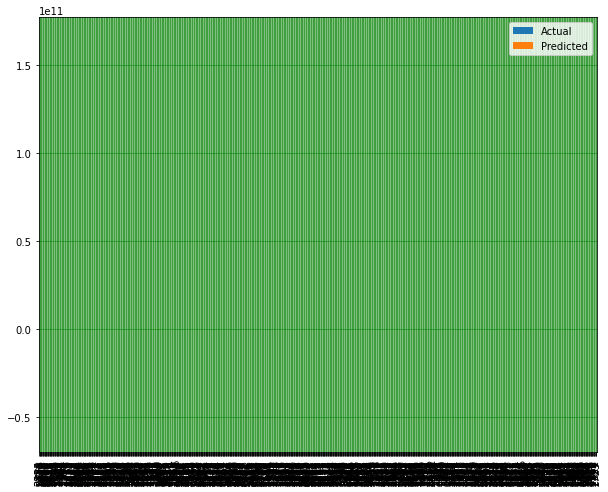

In [63]:
##SUPERVISED LEARNING ALGO



x_train, x_test, y_train, y_test = train_test_split(dt, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)



df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df1 = np.exp(df1.head(25))



df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()




In [64]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

2669194.7953095734
[-7.17031424e+08 -3.16889047e+07  1.00906787e+09 ... -3.96867096e+09
  6.77137253e+09 -4.40760064e+09]


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
print("MAE test score:", mean_absolute_error(y_test, y_pred))
print("MSE test score:", mean_squared_error(y_test, y_pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, y_pred)))

MAE test score: 405904073.4208424
MSE test score: 4.521789317265334e+19
RMSE test score: 6724425118.37654


In [66]:
#SVM
from sklearn.svm import SVR
svrs = [SVR(kernel='linear', gamma='scale'), SVR(kernel='poly', gamma='scale'), SVR(kernel='rbf', gamma='scale')]

In [67]:
for model in svrs:
    model.fit(x_train,y_train)

In [69]:


scores=[rg.score(x_test, y_test) for rg in svrs]
scores



[-0.004002096431936053, -0.0041457496420267415, -0.004163504406801577]